## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.891783 -1.128494 -1.511111  1.480049  0.256570  1.111722
1 -0.948399  0.437400  1.623973  0.737295 -0.487053  0.578941
2 -0.451129  0.991956 -1.514174  0.759261 -0.714997  1.443714
3 -1.755897  1.014128 -0.634978 -1.709264 -0.389092 -2.123909
4  0.759479 -0.260416 -0.051649  0.817056  0.552373  0.878785


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9244066	total: 56.1ms	remaining: 56.1s
1:	learn: 0.9158998	total: 57.1ms	remaining: 28.5s
2:	learn: 0.9061626	total: 57.6ms	remaining: 19.1s
3:	learn: 0.8963272	total: 58.3ms	remaining: 14.5s
4:	learn: 0.8875094	total: 59ms	remaining: 11.7s
5:	learn: 0.8782742	total: 59.5ms	remaining: 9.86s
6:	learn: 0.8690207	total: 60.1ms	remaining: 8.53s
7:	learn: 0.8609732	total: 60.6ms	remaining: 7.52s
8:	learn: 0.8526238	total: 61.1ms	remaining: 6.73s
9:	learn: 0.8445379	total: 61.6ms	remaining: 6.1s
10:	learn: 0.8358612	total: 62.1ms	remaining: 5.58s
11:	learn: 0.8271833	total: 62.6ms	remaining: 5.15s
12:	learn: 0.8189050	total: 63.3ms	remaining: 4.81s
13:	learn: 0.8123518	total: 63.9ms	remaining: 4.5s
14:	learn: 0.8060268	total: 64.4ms	remaining: 4.23s
15:	learn: 0.7985184	total: 64.9ms	remaining: 3.99s
16:	learn: 0.7912158	total: 65.4ms	remaining: 3.78s
17:	learn: 0.7838804	total: 65.9ms	remaining: 3.6s
18:	learn: 0.7761609	total: 66.4ms	remaining: 3.4

113:	learn: 0.3561635	total: 100ms	remaining: 779ms
114:	learn: 0.3534302	total: 101ms	remaining: 775ms
115:	learn: 0.3504821	total: 101ms	remaining: 772ms
116:	learn: 0.3474033	total: 102ms	remaining: 769ms
117:	learn: 0.3453008	total: 102ms	remaining: 765ms
118:	learn: 0.3433331	total: 103ms	remaining: 761ms
119:	learn: 0.3405966	total: 103ms	remaining: 758ms
120:	learn: 0.3383233	total: 104ms	remaining: 755ms
121:	learn: 0.3360762	total: 104ms	remaining: 751ms
122:	learn: 0.3334456	total: 105ms	remaining: 748ms
123:	learn: 0.3309985	total: 105ms	remaining: 745ms
124:	learn: 0.3285268	total: 106ms	remaining: 742ms
125:	learn: 0.3263594	total: 106ms	remaining: 738ms
126:	learn: 0.3241459	total: 107ms	remaining: 734ms
127:	learn: 0.3216603	total: 107ms	remaining: 732ms
128:	learn: 0.3190964	total: 108ms	remaining: 730ms
129:	learn: 0.3168344	total: 108ms	remaining: 726ms
130:	learn: 0.3151580	total: 109ms	remaining: 721ms
131:	learn: 0.3124956	total: 109ms	remaining: 718ms
132:	learn: 

290:	learn: 0.1114855	total: 186ms	remaining: 452ms
291:	learn: 0.1108116	total: 186ms	remaining: 452ms
292:	learn: 0.1099556	total: 187ms	remaining: 451ms
293:	learn: 0.1093197	total: 187ms	remaining: 450ms
294:	learn: 0.1086413	total: 188ms	remaining: 448ms
295:	learn: 0.1080472	total: 188ms	remaining: 447ms
296:	learn: 0.1073968	total: 189ms	remaining: 446ms
297:	learn: 0.1067461	total: 189ms	remaining: 445ms
298:	learn: 0.1061622	total: 189ms	remaining: 444ms
299:	learn: 0.1055988	total: 190ms	remaining: 443ms
300:	learn: 0.1049639	total: 190ms	remaining: 441ms
301:	learn: 0.1044469	total: 191ms	remaining: 440ms
302:	learn: 0.1039693	total: 191ms	remaining: 440ms
303:	learn: 0.1033609	total: 192ms	remaining: 439ms
304:	learn: 0.1027658	total: 192ms	remaining: 438ms
305:	learn: 0.1023374	total: 193ms	remaining: 437ms
306:	learn: 0.1018534	total: 193ms	remaining: 436ms
307:	learn: 0.1012605	total: 193ms	remaining: 434ms
308:	learn: 0.1006648	total: 194ms	remaining: 434ms
309:	learn: 

499:	learn: 0.0349308	total: 282ms	remaining: 282ms
500:	learn: 0.0348235	total: 283ms	remaining: 282ms
501:	learn: 0.0347101	total: 283ms	remaining: 281ms
502:	learn: 0.0345991	total: 284ms	remaining: 280ms
503:	learn: 0.0343981	total: 284ms	remaining: 280ms
504:	learn: 0.0342598	total: 285ms	remaining: 279ms
505:	learn: 0.0341201	total: 285ms	remaining: 279ms
506:	learn: 0.0339253	total: 286ms	remaining: 278ms
507:	learn: 0.0337360	total: 286ms	remaining: 277ms
508:	learn: 0.0336288	total: 287ms	remaining: 277ms
509:	learn: 0.0334390	total: 287ms	remaining: 276ms
510:	learn: 0.0332521	total: 287ms	remaining: 275ms
511:	learn: 0.0330946	total: 288ms	remaining: 274ms
512:	learn: 0.0329914	total: 288ms	remaining: 274ms
513:	learn: 0.0328604	total: 289ms	remaining: 273ms
514:	learn: 0.0327601	total: 289ms	remaining: 272ms
515:	learn: 0.0325764	total: 289ms	remaining: 271ms
516:	learn: 0.0324451	total: 290ms	remaining: 271ms
517:	learn: 0.0323261	total: 290ms	remaining: 270ms
518:	learn: 

701:	learn: 0.0155598	total: 366ms	remaining: 156ms
702:	learn: 0.0154846	total: 367ms	remaining: 155ms
703:	learn: 0.0154245	total: 367ms	remaining: 154ms
704:	learn: 0.0153478	total: 368ms	remaining: 154ms
705:	learn: 0.0152978	total: 368ms	remaining: 153ms
706:	learn: 0.0152583	total: 369ms	remaining: 153ms
707:	learn: 0.0152133	total: 369ms	remaining: 152ms
708:	learn: 0.0151530	total: 370ms	remaining: 152ms
709:	learn: 0.0151145	total: 370ms	remaining: 151ms
710:	learn: 0.0150793	total: 371ms	remaining: 151ms
711:	learn: 0.0150538	total: 371ms	remaining: 150ms
712:	learn: 0.0150062	total: 372ms	remaining: 150ms
713:	learn: 0.0149628	total: 372ms	remaining: 149ms
714:	learn: 0.0149040	total: 373ms	remaining: 149ms
715:	learn: 0.0148681	total: 374ms	remaining: 148ms
716:	learn: 0.0148107	total: 374ms	remaining: 148ms
717:	learn: 0.0147683	total: 374ms	remaining: 147ms
718:	learn: 0.0146871	total: 375ms	remaining: 146ms
719:	learn: 0.0146078	total: 375ms	remaining: 146ms
720:	learn: 

905:	learn: 0.0081662	total: 463ms	remaining: 48ms
906:	learn: 0.0081387	total: 464ms	remaining: 47.6ms
907:	learn: 0.0081023	total: 464ms	remaining: 47ms
908:	learn: 0.0080808	total: 465ms	remaining: 46.5ms
909:	learn: 0.0080644	total: 465ms	remaining: 46ms
910:	learn: 0.0080532	total: 466ms	remaining: 45.5ms
911:	learn: 0.0080264	total: 467ms	remaining: 45ms
912:	learn: 0.0080060	total: 467ms	remaining: 44.5ms
913:	learn: 0.0079951	total: 468ms	remaining: 44ms
914:	learn: 0.0079696	total: 468ms	remaining: 43.5ms
915:	learn: 0.0079565	total: 469ms	remaining: 43ms
916:	learn: 0.0079495	total: 470ms	remaining: 42.5ms
917:	learn: 0.0079297	total: 471ms	remaining: 42.1ms
918:	learn: 0.0079192	total: 471ms	remaining: 41.5ms
919:	learn: 0.0078998	total: 472ms	remaining: 41ms
920:	learn: 0.0078761	total: 473ms	remaining: 40.5ms
921:	learn: 0.0078647	total: 473ms	remaining: 40ms
922:	learn: 0.0078414	total: 474ms	remaining: 39.5ms
923:	learn: 0.0078184	total: 474ms	remaining: 39ms
924:	learn:

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

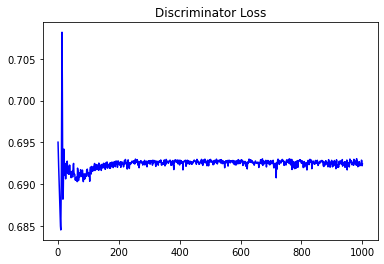

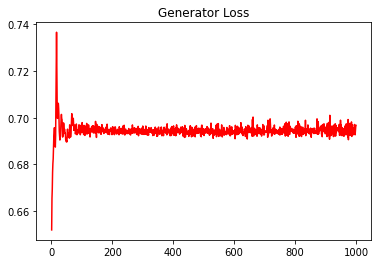

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.15192715434508605


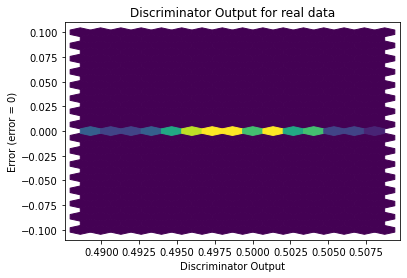

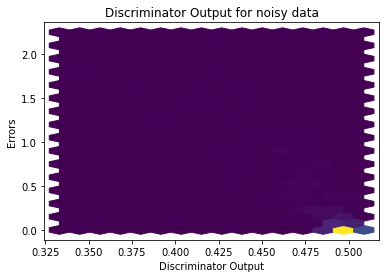

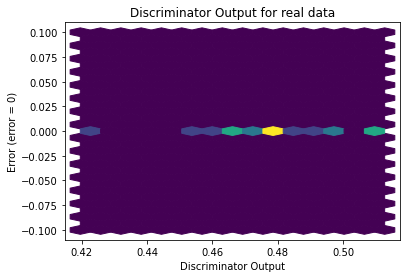

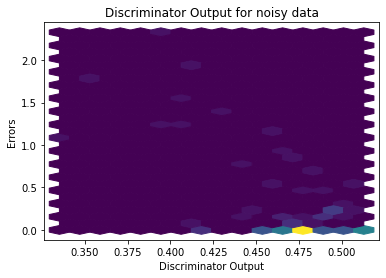

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


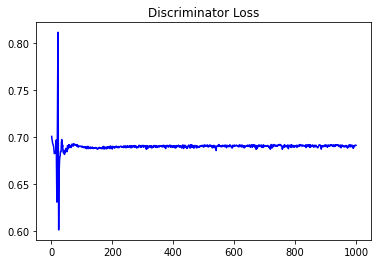

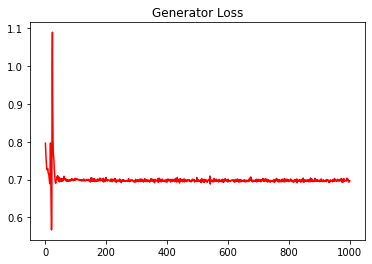

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.14408664040091412


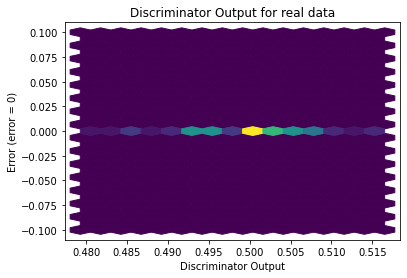

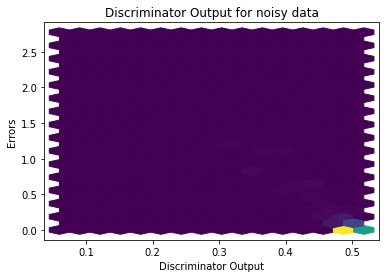

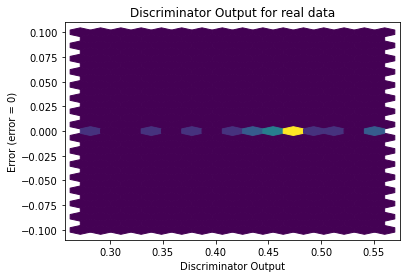

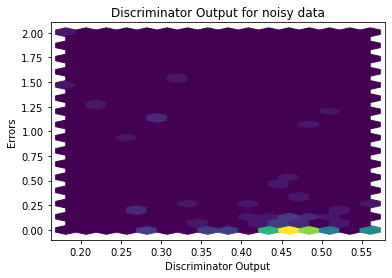

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.7519]], requires_grad=True)
